# First Neural Network

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
%matplotlib inline

# Preprocessing Data

In [3]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# load data, split between train and test sets
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = train_images.astype("float32") / 255
x_test = test_images.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(train_labels, num_classes)
y_test = keras.utils.to_categorical(test_labels, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


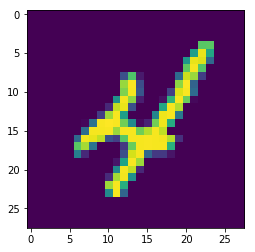

In [6]:
# Image example
plt.imshow(train_images[9])
plt.show()

# NN Keras model

In [7]:
model = keras.Sequential(
    [
        layers.Flatten(input_shape=input_shape),
        layers.Dense(128, activation="sigmoid"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


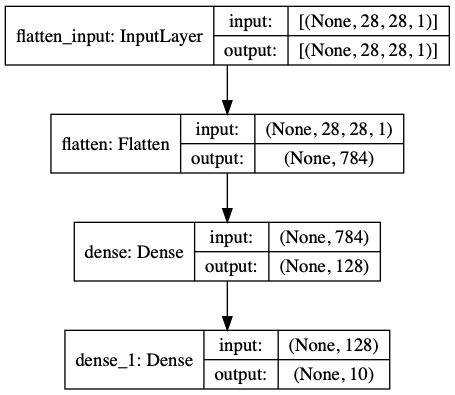

In [8]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [9]:
n_epochs = 10
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=128, epochs=n_epochs, validation_split=0.2)


Epoch 1/15
422/422 [==============================] - 2s 4ms/step - loss: 1.0038 - accuracy: 0.7551 - val_loss: 0.2750 - val_accuracy: 0.9327
Epoch 2/15
422/422 [==============================] - 2s 5ms/step - loss: 0.3033 - accuracy: 0.9154 - val_loss: 0.2068 - val_accuracy: 0.9435
Epoch 3/15
422/422 [==============================] - 1s 3ms/step - loss: 0.2375 - accuracy: 0.9321 - val_loss: 0.1744 - val_accuracy: 0.9530
Epoch 4/15
422/422 [==============================] - 2s 5ms/step - loss: 0.2021 - accuracy: 0.9427 - val_loss: 0.1515 - val_accuracy: 0.9608
Epoch 5/15
422/422 [==============================] - 3s 6ms/step - loss: 0.1781 - accuracy: 0.9497 - val_loss: 0.1372 - val_accuracy: 0.9635
Epoch 6/15
422/422 [==============================] - 3s 6ms/step - loss: 0.1514 - accuracy: 0.9578 - val_loss: 0.1275 - val_accuracy: 0.9658
Epoch 7/15
422/422 [==============================] - 2s 6ms/step - loss: 0.1319 - accuracy: 0.9633 - val_loss: 0.1185 - val_accuracy: 0.9672
Epoch 

## Evaluating the model

In [10]:
import pandas as pd
def show_loss_accuracy_evolution(hist):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Sparse Categorical Crossentropy')
    ax1.plot(hist['epoch'], hist['loss'], label='Train Error')
    ax1.plot(hist['epoch'], hist['val_loss'], label = 'Val Error')
    ax1.grid()
    ax1.legend()

    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.plot(hist['epoch'], hist['accuracy'], label='Train Accuracy')
    ax2.plot(hist['epoch'], hist['val_accuracy'], label = 'Val Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.08829976618289948
Test accuracy: 0.9718999862670898


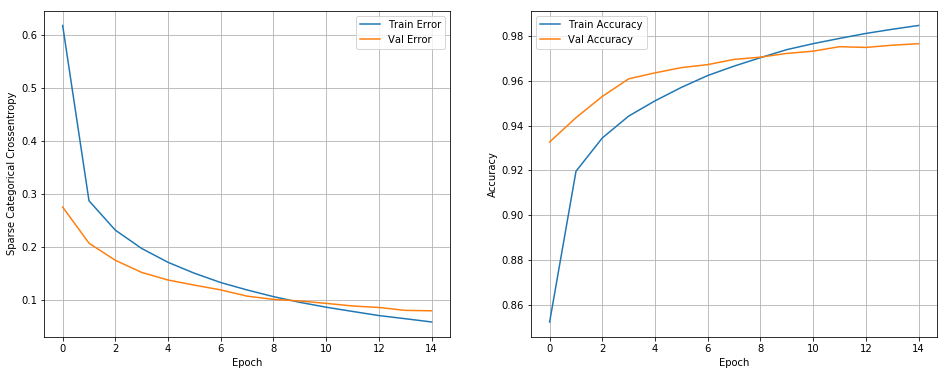

In [12]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
show_loss_accuracy_evolution(hist)